In [1]:
import pandas as pd

In [2]:
data= pd.read_csv('4_5954230208893554116.csv', na_values='?')

# Handle_Missing_Data
calculate percision of missing data in rows

In [3]:
data.head()
mask= data.isnull().any(axis=1)
num_of_rows_with_NAN= mask.sum()
total_num_of_rows= len(data)
print(num_of_rows_with_NAN / total_num_of_rows)

1.0


percision of missing data is large..
now, we will calculate percision of missing data in each column

In [4]:
data.isnull().sum() / len(data)

age                          0.000265
sex                          0.039767
on_thyroxine                 0.000000
query_on_thyroxine           0.000000
on_antithyroid_medication    0.000000
sick                         0.000000
pregnant                     0.000000
thyroid_surgery              0.000000
I131_treatment               0.000000
query_hypothyroid            0.000000
query_hyperthyroid           0.000000
lithium                      0.000000
goitre                       0.000000
tumor                        0.000000
hypopituitary                0.000000
psych                        0.000000
TSH_measured                 0.000000
TSH                          0.097826
T3_measured                  0.000000
T3                           0.203871
TT4_measured                 0.000000
TT4                          0.061241
T4U_measured                 0.000000
T4U                          0.102598
FTI_measured                 0.000000
FTI                          0.102068
TBG_measured

Delete column that has high percision of missing data, then fill other missing data in row with zeroes or most frequency value


In [5]:
data_without_nan_col= data.drop(columns=['TBG','T3'])
mask= data_without_nan_col.isnull().any(axis=1)

mask.sum()/len(data_without_nan_col)
most_freq_val= data_without_nan_col['sex'].mode()[0]


In [6]:
data_2= data_without_nan_col.fillna({'sex':most_freq_val})
data_clean= data_2.fillna(0.0)
data_clean.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,t,125.0,t,1.14,t,109.0,f,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,t,102.0,f,0.00,f,0.0,f,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,f,t,109.0,t,0.91,t,120.0,f,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,t,175.0,f,0.00,f,0.0,f,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,t,61.0,t,0.87,t,70.0,f,SVI,negative


In [7]:
data_clean.dtypes

age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
sick                          object
pregnant                      object
thyroid_surgery               object
I131_treatment                object
query_hypothyroid             object
query_hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH_measured                  object
TSH                          float64
T3_measured                   object
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
referral_source               object
C

In [8]:
print(data_clean['sex'].unique())
print(data_clean['on_thyroxine'].unique())
print(data_clean['query_on_thyroxine'].unique())
print(data_clean['on_antithyroid_medication'].unique())
print(data_clean['sick'].unique())
print(data_clean['pregnant'].unique())
print(data_clean['thyroid_surgery'].unique())
print(data_clean['I131_treatment'].unique())
print(data_clean['query_hypothyroid'].unique())
print(data_clean['query_hyperthyroid'].unique())
print(data_clean['lithium'].unique())
print(data_clean['goitre'].unique())
print(data_clean['tumor'].unique())
print(data_clean['hypopituitary'].unique())
print(data_clean['psych'].unique())
print(data_clean['TSH_measured'].unique())
print(data_clean['T3_measured'].unique())
print(data_clean['TT4_measured'].unique())
print(data_clean['T4U_measured'].unique())
print(data_clean['FTI_measured'].unique())
print(data_clean['referral_source'].unique())
print(data_clean['Class'].unique())

['F' 'M']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['t' 'f']
['t' 'f']
['t' 'f']
['t' 'f']
['t' 'f']
['SVHC' 'other' 'SVI' 'STMW' 'SVHD']
['negative' 'sick']


In [9]:
data_encod= data_clean.replace({
    'sex':{'F':1, 'M':0},
    'on_thyroxine':{'f':0, 't':1},
    'query_on_thyroxine': {'f':0, 't':1},
    'on_antithyroid_medication': {'f':0, 't':1},
    'sick': {'f':0, 't':1},
    'pregnant': {'f':0, 't':1},
    'thyroid_surgery': {'f':0, 't':1},
    'I131_treatment': {'f':0, 't':1},
    'query_hypothyroid': {'f':0, 't':1},
    'query_hyperthyroid': {'f':0, 't':1},
    'lithium': {'f':0, 't':1},
    'goitre': {'f':0, 't':1},
    'tumor': {'f':0, 't':1},
    'hypopituitary': {'f':0, 't':1},
    'psych': {'f':0, 't':1},
    'TSH_measured': {'f':0, 't':1},
    'T3_measured': {'f':0, 't':1},
    'TT4_measured': {'f':0, 't':1},
    'T4U_measured': {'f':0, 't':1},
    'FTI_measured': {'f':0, 't':1},
     'TBG_measured': {'f':0, 't':1},
    'Class': {'negative':0 ,'sick':1}
    
})
data_encod.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,Class
0,41.0,1,0,0,0,0,0,0,0,0,...,1,1,125.0,1,1.14,1,109.0,0,SVHC,0
1,23.0,1,0,0,0,0,0,0,0,0,...,1,1,102.0,0,0.00,0,0.0,0,other,0
2,46.0,0,0,0,0,0,0,0,0,0,...,0,1,109.0,1,0.91,1,120.0,0,other,0
3,70.0,1,1,0,0,0,0,0,0,0,...,1,1,175.0,0,0.00,0,0.0,0,other,0
4,70.0,1,0,0,0,0,0,0,0,0,...,1,1,61.0,1,0.87,1,70.0,0,SVI,0


In [10]:
data_clean= pd.get_dummies(data_encod)
data_clean

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T4U,FTI_measured,FTI,TBG_measured,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41.0,1,0,0,0,0,0,0,0,0,...,1.14,1,109.0,0,0,0,1,0,0,0
1,23.0,1,0,0,0,0,0,0,0,0,...,0.00,0,0.0,0,0,0,0,0,0,1
2,46.0,0,0,0,0,0,0,0,0,0,...,0.91,1,120.0,0,0,0,0,0,0,1
3,70.0,1,1,0,0,0,0,0,0,0,...,0.00,0,0.0,0,0,0,0,0,0,1
4,70.0,1,0,0,0,0,0,0,0,0,...,0.87,1,70.0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,1,0,0,0,0,0,0,0,0,...,0.00,0,0.0,0,0,0,0,0,0,1
3768,68.0,1,0,0,0,0,0,0,0,0,...,1.08,1,114.0,0,0,0,0,0,1,0
3769,74.0,1,0,0,0,0,0,0,0,0,...,1.07,1,105.0,0,0,0,0,0,0,1
3770,72.0,0,0,0,0,0,0,0,0,0,...,0.94,1,87.0,0,0,0,0,0,1,0


In [11]:
data_input= data_clean.drop(columns=['Class'])
data_output= data_clean['Class']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x, x_test, y, y_test= train_test_split(
    data_input, data_output, test_size=0.33, random_state=0
)
x_train,x_val, y_train, y_val= train_test_split(
    x, y, test_size=0.33, random_state=0
)

In [14]:
print(x_train.shape)
print(y_train.shape)
print('-----------')
print(x_val.shape)
print(y_val.shape)
print('-----------')
print(x_test.shape)
print(y_test.shape)

(1693, 31)
(1693,)
-----------
(834, 31)
(834,)
-----------
(1245, 31)
(1245,)


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
Scaler= StandardScaler()
Scaler.fit(x_train)
x_train_scaled= Scaler.transform(x_train)
x_val_scaled= Scaler.transform(x_val)
x_test_scaled= Scaler.transform(x_test)

In [17]:
x_train_scaled[:5]

array([[ 6.26835310e-01,  6.79708360e-01,  2.61494990e+00,
        -1.19916088e-01, -9.76772581e-02, -1.99815640e-01,
        -1.22425527e-01, -1.34311903e-01, -1.36573153e-01,
        -2.64885539e-01, -2.67430341e-01, -7.31055268e-02,
        -8.44902833e-02, -1.55558436e-01, -2.43108319e-02,
        -2.27052406e-01,  3.21948112e-01, -1.82646915e-01,
        -1.96950820e+00,  2.46529800e-01,  1.45137348e+00,
         3.21948112e-01,  2.76672496e-01,  3.20829544e-01,
         1.40846170e+00,  0.00000000e+00, -1.68979497e-01,
        -3.49192005e-01, -1.00713445e-01, -5.89855861e-01,
         8.24356411e-01],
       [-3.65800510e-01,  6.79708360e-01, -3.82416505e-01,
        -1.19916088e-01, -9.76772581e-02, -1.99815640e-01,
        -1.22425527e-01, -1.34311903e-01, -1.36573153e-01,
        -2.64885539e-01, -2.67430341e-01, -7.31055268e-02,
        -8.44902833e-02, -1.55558436e-01, -2.43108319e-02,
        -2.27052406e-01,  3.21948112e-01,  6.02834616e-02,
         5.07740969e-01,  2.46

# KNN Model

 look at the error rate for different k values
 

In [18]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.3039234737753018
RMSE value for k=  2 is: 0.26320544909582505
RMSE value for k=  3 is: 0.2452584717864875
RMSE value for k=  4 is: 0.2436956097282083
RMSE value for k=  5 is: 0.2400133865075264
RMSE value for k=  6 is: 0.2376348580226272
RMSE value for k=  7 is: 0.23729066583714364
RMSE value for k=  8 is: 0.23762018730245674
RMSE value for k=  9 is: 0.23667838775331948
RMSE value for k=  10 is: 0.2357931160451831
RMSE value for k=  11 is: 0.23560132075731985
RMSE value for k=  12 is: 0.23525219788273358
RMSE value for k=  13 is: 0.23511508795484934
RMSE value for k=  14 is: 0.2347207804324585
RMSE value for k=  15 is: 0.23470432945909875
RMSE value for k=  16 is: 0.23386029494166127
RMSE value for k=  17 is: 0.23406245083087063
RMSE value for k=  18 is: 0.23425690022852153
RMSE value for k=  19 is: 0.23412922906057565
RMSE value for k=  20 is: 0.23454219270878016


#plotting the rmse values against k values


<Axes: >

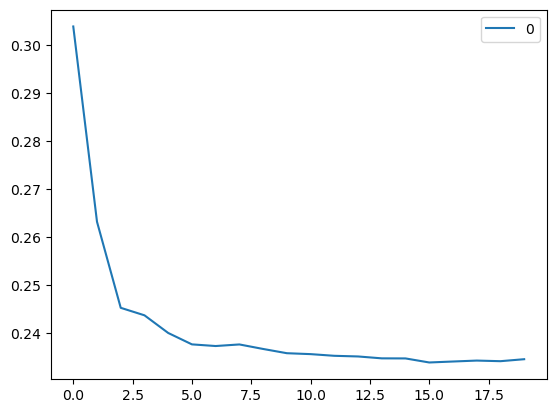

In [19]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
KNN=  KNeighborsClassifier(n_neighbors=20)

In [23]:
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
# Calculating accuracy of training
y_pred_train = KNN.predict(x_train)
accuracy_score(y_train, y_pred_train)

0.9462492616656822

In [26]:
y_pred_test = KNN.predict(x_test)
accuracy_score(y_test, y_pred_test)

0.9325301204819277

#can simply use gridsearch to find the best value

In [27]:
from sklearn.model_selection import GridSearchCV
import numpy as np
params = {'n_neighbors':np.arange(1,50)}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 31}

# Decision Tree Model

In [28]:
from sklearn.metrics import accuracy_score

def evaluate_model(model, x_train, y_train, x_val, y_val):
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_val = model.predict(x_val)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    return acc_train, acc_val

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
model = DecisionTreeClassifier()
evaluate_model(model, x_train, y_train, x_val, y_val)

(1.0, 0.9112709832134293)

In [31]:
from sklearn.metrics import confusion_matrix

y_pred_val = model.predict(x_val)
cf = confusion_matrix(y_val, y_pred_val)
print(cf)

[[747  31]
 [ 43  13]]


In [32]:
cf_row_sum = cf.sum(axis=1, keepdims=True)
print(cf_row_sum)

[[778]
 [ 56]]


In [33]:
cf_normalized = cf/cf_row_sum
print(cf_normalized)

[[0.96015424 0.03984576]
 [0.76785714 0.23214286]]


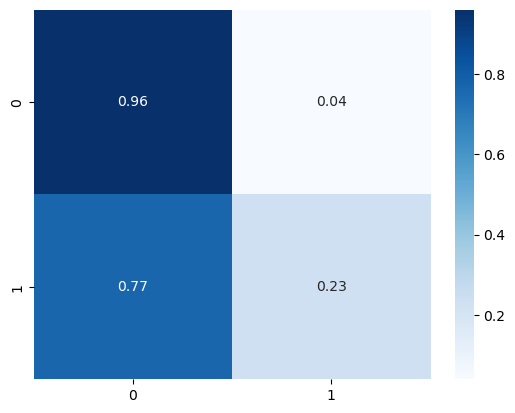

In [34]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

sn.heatmap(cf_normalized, annot=True, cmap='Blues')
plt.show()

In [35]:
def plot_conf_matrix(model, x_val, y_val):
    y_pred_val = model.predict(x_val)
    cf = confusion_matrix(y_val, y_pred_val)
    cf_row_sum = cf.sum(axis=1, keepdims=True)
    cf_normalized = cf/cf_row_sum
    sn.heatmap(cf_normalized, annot=True, cmap='Blues')
    plt.show()
    return cf

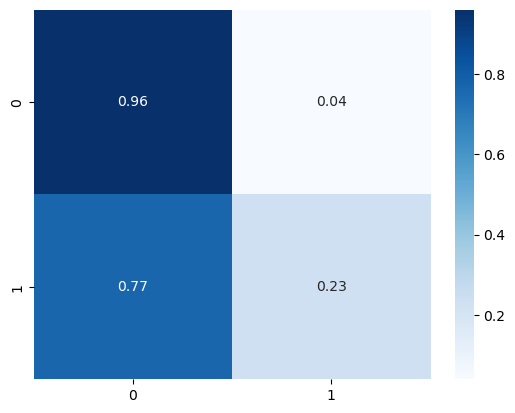

array([[747,  31],
       [ 43,  13]], dtype=int64)

In [36]:
plot_conf_matrix(model, x_val, y_val)

In [37]:
y_train.value_counts()

0    1602
1      91
Name: Class, dtype: int64

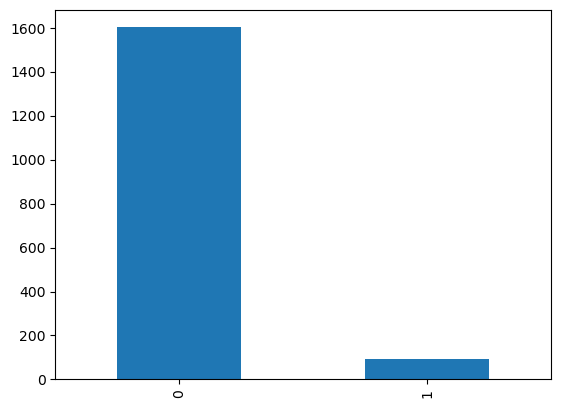

In [38]:
y_train.value_counts().plot.bar()
plt.show()

In [39]:
!pip3 install imblearn

In [40]:
from imblearn.under_sampling import RandomUnderSampler

In [41]:
rus = RandomUnderSampler(sampling_strategy=0.5, random_state=0)
X_train_us, y_train_us = rus.fit_resample(x_train, y_train)

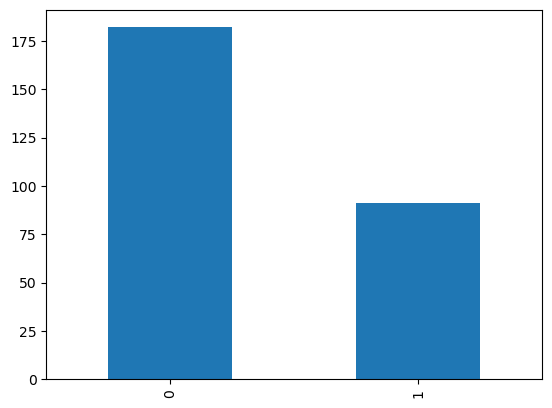

In [42]:
y_train_us.value_counts().plot.bar()
plt.show()

In [43]:
from imblearn.over_sampling import RandomOverSampler

In [44]:
ros = RandomOverSampler(sampling_strategy=1.0, random_state=0)
X_train_os, y_train_os = ros.fit_resample(X_train_us, y_train_us)
X_train_balanced, y_train_balanced = ros.fit_resample(
    x_train, y_train
)

y_train_balanced.value_counts()

0    1602
1    1602
Name: Class, dtype: int64

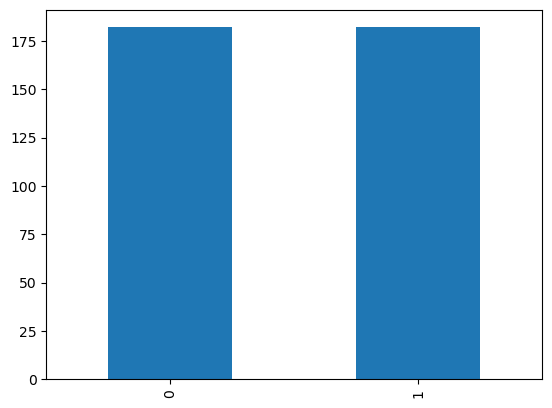

In [45]:
y_train_os.value_counts().plot.bar()
plt.show()

In [46]:
model2 = DecisionTreeClassifier()
evaluate_model(model2, X_train_os, y_train_os, x_val, y_val)

(1.0, 0.7829736211031175)

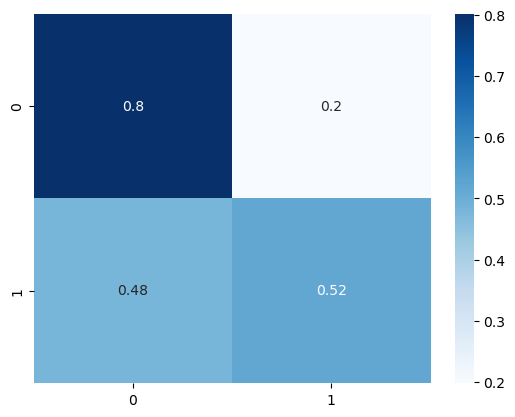

array([[624, 154],
       [ 27,  29]], dtype=int64)

In [47]:
plot_conf_matrix(model2, x_val, y_val)

In [48]:
max_depth_values = list(range(1, 30))
acc_train_values = []
acc_val_values = []

for max_depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    acc_train, acc_val = evaluate_model(model, X_train_os, y_train_os, x_val, y_val)
    acc_train_values.append(acc_train)
    acc_val_values.append(acc_val)
    
results_max_depth = pd.DataFrame({
    'max_depth': max_depth_values,
    'acc_train': acc_train_values,
    'acc_val': acc_val_values,
})

results_max_depth

,max_depth,acc_train,acc_val
0,1,0.815934,0.754197
1,2,0.837912,0.699041
2,3,0.854396,0.758993
3,4,0.884615,0.770983
4,5,0.909341,0.736211
5,6,0.917582,0.748201
6,7,0.947802,0.781775
7,8,0.967033,0.802158
8,9,0.986264,0.800959
9,10,0.997253,0.781775


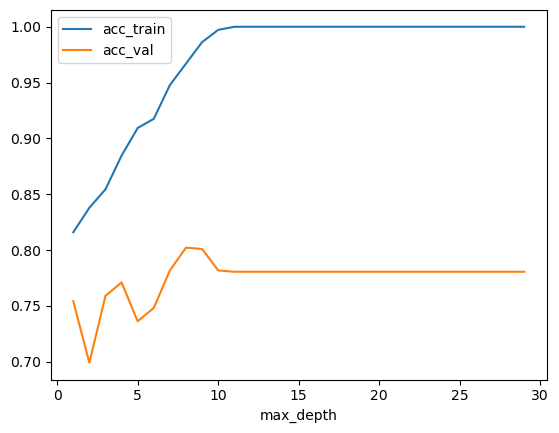

In [49]:
results_max_depth.plot(x='max_depth', y=['acc_train', 'acc_val'])
plt.show()

In [50]:
best_model = DecisionTreeClassifier(max_depth=3, random_state=0)
evaluate_model(best_model, X_train_os, y_train_os, x_test, y_test)

(0.8543956043956044, 0.7606425702811245)

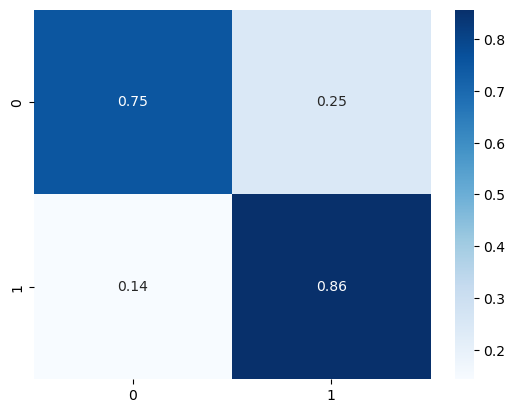

array([[875, 286],
       [ 12,  72]], dtype=int64)

In [51]:
plot_conf_matrix(best_model, x_test, y_test)

In [52]:
importances = pd.Series(best_model.feature_importances_, index=X_train_os.columns)
importances

age                          0.076173
sex                          0.000000
on_thyroxine                 0.000000
query_on_thyroxine           0.000000
on_antithyroid_medication    0.000000
sick                         0.000000
pregnant                     0.000000
thyroid_surgery              0.000000
I131_treatment               0.000000
query_hypothyroid            0.000000
query_hyperthyroid           0.000000
lithium                      0.000000
goitre                       0.000000
tumor                        0.000000
hypopituitary                0.000000
psych                        0.000000
TSH_measured                 0.000000
TSH                          0.000000
T3_measured                  0.000000
TT4_measured                 0.000000
TT4                          0.047864
T4U_measured                 0.000000
T4U                          0.078336
FTI_measured                 0.000000
FTI                          0.086457
TBG_measured                 0.000000
referral_sou

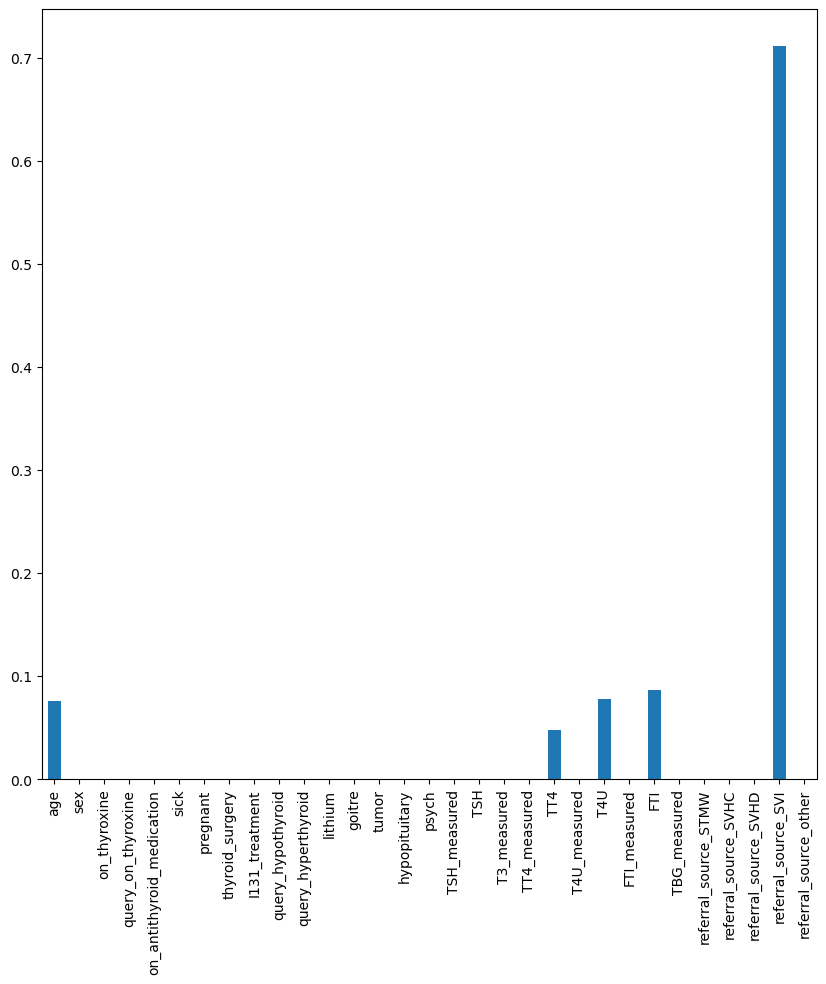

In [53]:
importances.plot.bar(figsize=(10, 10))
plt.show()

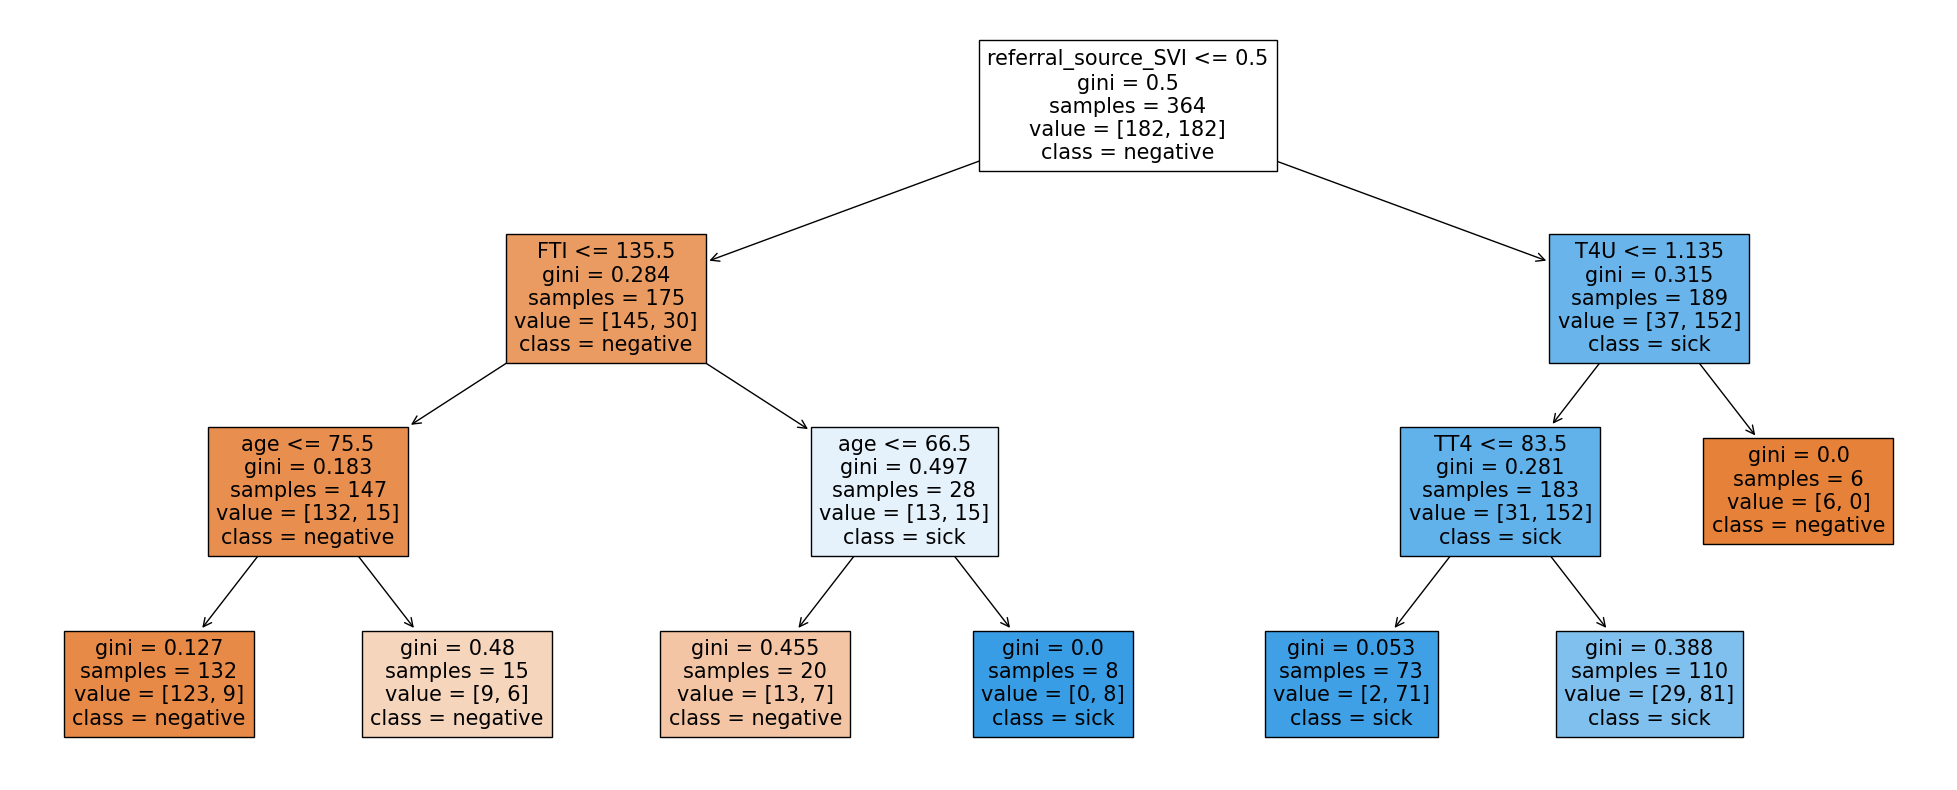

In [54]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 10))
plot_tree(
    best_model,
    feature_names=X_train_os.columns,
    class_names=['negative', 'sick'],
    filled=True
)
plt.show()

# Logistic Regression MODEL

In [55]:
from sklearn import linear_model,metrics,preprocessing
from sklearn.linear_model import LogisticRegression

In [56]:
x_normalization=preprocessing.StandardScaler()
x_norm=x_normalization.fit_transform(data_input)

In [57]:
x, x_test, y, y_test= train_test_split(
    x_norm, data_output, test_size=0.3, random_state=0,stratify=data_output
)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1693, 31), (1132, 31), (1693,), (1132,))

In [58]:
l=linear_model.LogisticRegression()
l.fit(x_train,y_train)

C:\Users\besho\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
y_pred=l.predict(x_test)

C:\Users\besho\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [60]:
metrics.accuracy_score(y_test,y_pred)

0.8533568904593639

LR: 0.937121 (0.010606)
KNN: 0.936742 (0.014279)
CART: 0.912121 (0.012990)


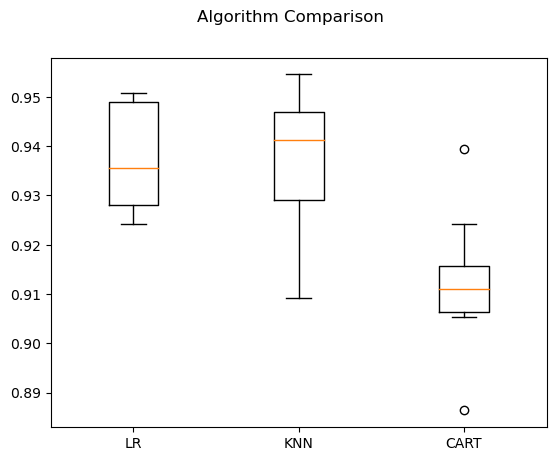

In [61]:
import matplotlib.pyplot as plt
from sklearn import model_selection
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
 kfold = model_selection.KFold(n_splits=10)
 cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# linear Regression

C:\Users\besho\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


LR: 0.050313 (0.006031)
KNN: 0.063258 (0.014279)
CART: 0.085227 (0.011888)


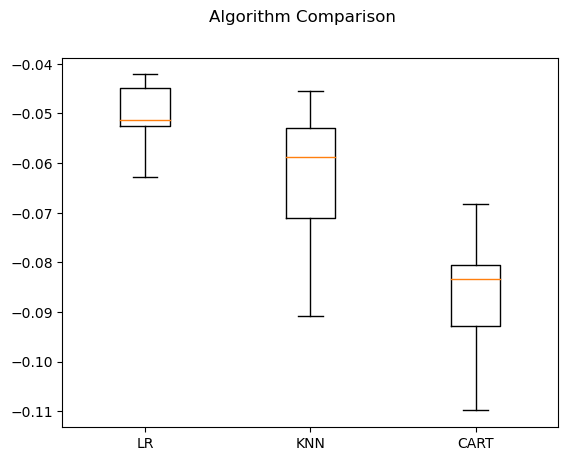

In [62]:
from sklearn import linear_model, metrics, preprocessing
from sklearn.linear_model import LinearRegression
x_normalization = preprocessing.StandardScaler()
x_norm = x_normalization.fit_transform(data_input)
x, x_test, y, y_test = train_test_split(
    x_norm, data_output, test_size=0.3, random_state=0, stratify=data_output
)
x_train.shape, x_test.shape, y_train.shape, y_test.shape
l = linear_model.LinearRegression()
l.fit(x_train, y_train)
y_pred = l.predict(x_test)
metrics.mean_squared_error(y_test, y_pred)
import matplotlib.pyplot as plt
from sklearn import model_selection
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_squared_error'
for name, model in models:
 kfold = model_selection.KFold(n_splits=10)
 cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, -cv_results.mean(), cv_results.std())
 print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


# Niave Bays 

Accuracy:  0.3736749116607774
NB: 0.283680 (0.047445)
LR: nan (nan)


C:\Users\besho\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\besho\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\besho\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\besho\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\besho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\besho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 95, in

KNN: 0.935055 (0.009070)
CART: 0.920739 (0.016020)


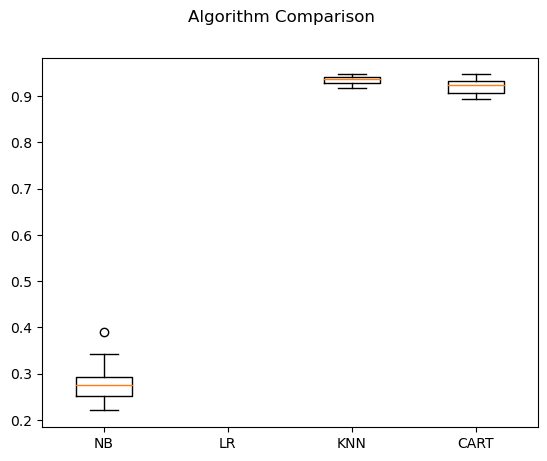

In [63]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import model_selection

# Normalize the input data
x_normalization = preprocessing.StandardScaler()
x_norm = x_normalization.fit_transform(data_input)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_norm, data_output, test_size=0.3, random_state=0, stratify=data_output)

# Create a Naive Bayes model and fit it to the training data
nb = GaussianNB()
nb.fit(x_train, y_train)

# Predict the output values for the test set using the Naive Bayes model
y_pred = nb.predict(x_test)

# Calculate the accuracy of the Naive Bayes model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Compare the performance of different models using cross-validation
models = []
models.append(('NB', GaussianNB()))
models.append(('LR', linear_model.LinearRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))

# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, x_norm, data_output, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


# Random Forest 

Accuracy: 0.9434628975265018
RF: 0.943268 (0.006717)
LR: nan (nan)


C:\Users\besho\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\besho\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\besho\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\besho\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\besho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\besho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 95, in

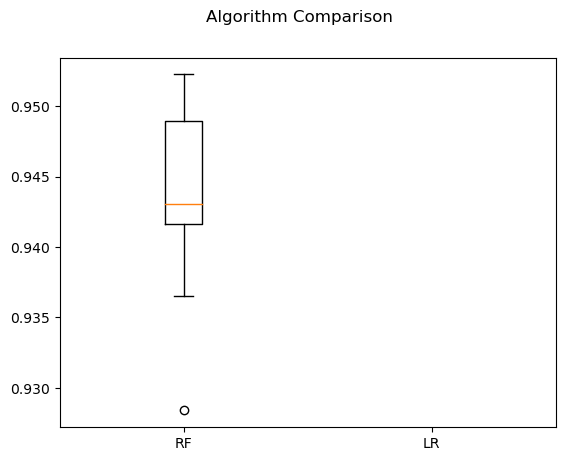

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics, preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Normalize input data
x_normalization = preprocessing.StandardScaler()
x_norm = x_normalization.fit_transform(data_input)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    x_norm, data_output, test_size=0.3, random_state=0, stratify=data_output
)

# Train Random Forest model on the training set
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = rf.predict(x_test)

# Evaluate model accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compare algorithm performance using 10-fold cross-validation
models = []
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('LR', linear_model.LinearRegression()))

results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, x_norm, data_output, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Compare algorithm performance using boxplot visualization
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
